# Análisis del Pima Indians Diabetes Database

### Contexto
Este conjunto de datos proviene originalmente del National Institute of Diabetes and Digestive and Kidney Diseases (Instituto Nacional de la Diabetes y Enfermedades Digestivas y Renales). El objetivo principal de este dataset es predecir diagnósticamente si una paciente tiene diabetes o no, basándose en varias mediciones diagnósticas incluidas en el conjunto de datos.

Es importante resaltar que este conjunto de datos ha sido extraído de una base de datos más amplia, con varias restricciones sobre las instancias seleccionadas. Específicamente, todos los pacientes en este dataset *son mujeres mayores de 21 años de ascendencia indígena Pima.* Esta característica lo convierte en un caso único y específico dentro de los estudios sobre diabetes, debido a la herencia genética de la población.

### Contenido del Dataset
El dataset contiene varias variables predictoras médicas y una variable objetivo. Las variables predictoras incluyen datos médicos clave como el número de embarazos que ha tenido la paciente, su índice de masa corporal (BMI), los niveles de insulina, la edad y otros factores relacionados. Estas variables se utilizan para tratar de predecir si una paciente tiene diabetes (variable objetivo, Outcome).

*Las variables incluidas en el dataset son las siguientes:*

* Number of pregnancies: Número de embarazos que ha tenido la paciente.

* BMI: Índice de masa corporal.

* Insulin level: Nivel de insulina.

* Age: Edad de la paciente.

* Glucose concentration: Concentración de glucosa.

* Blood pressure: Presión arterial.

* Skin thickness: Grosor de la piel.

* Diabetes pedigree function: Función de genealogía de la diabetes, que evalúa la herencia genética en relación con la diabetes.

### La variable objetivo (`Outcome`) es binaria, donde:

* 0 indica que la paciente no tiene diabetes.

* 1 indica que la paciente tiene diabetes.

### Propósito del Análisis
El objetivo de este análisis es construir un modelo de machine learning que pueda predecir con precisión si las pacientes en el conjunto de datos tienen diabetes o no, utilizando las variables predictoras mencionadas anteriormente.

### Objetivos del Proyecto
* *Exploración y visualización de datos:* Analizar la distribución de las variables predictoras y su relación con la variable objetivo.

* *Preprocesamiento de datos:* Gestionar valores faltantes, normalizar las características y preparar los datos para los modelos de machine learning.

* *Modelado predictivo:* Construir y entrenar modelos de machine learning como regresión logística, árboles de decisión, y máquinas de soporte vectorial (SVM) para predecir el diagnóstico de diabetes.

* *Evaluación del modelo:* Evaluar el rendimiento de los modelos utilizando métricas estándar como la exactitud, la matriz de confusión, el F1 score y la curva ROC.

### Referencia
1. https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data

In [115]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
    classification_report
from sklearn.neighbors import KNeighborsClassifier

In [116]:
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

In [117]:
df = pd.read_csv(f"{path}/diabetes.csv", low_memory=False)

In [118]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [120]:
df = df[df['Glucose'] != 0]

In [121]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,69.115334,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,19.399240,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


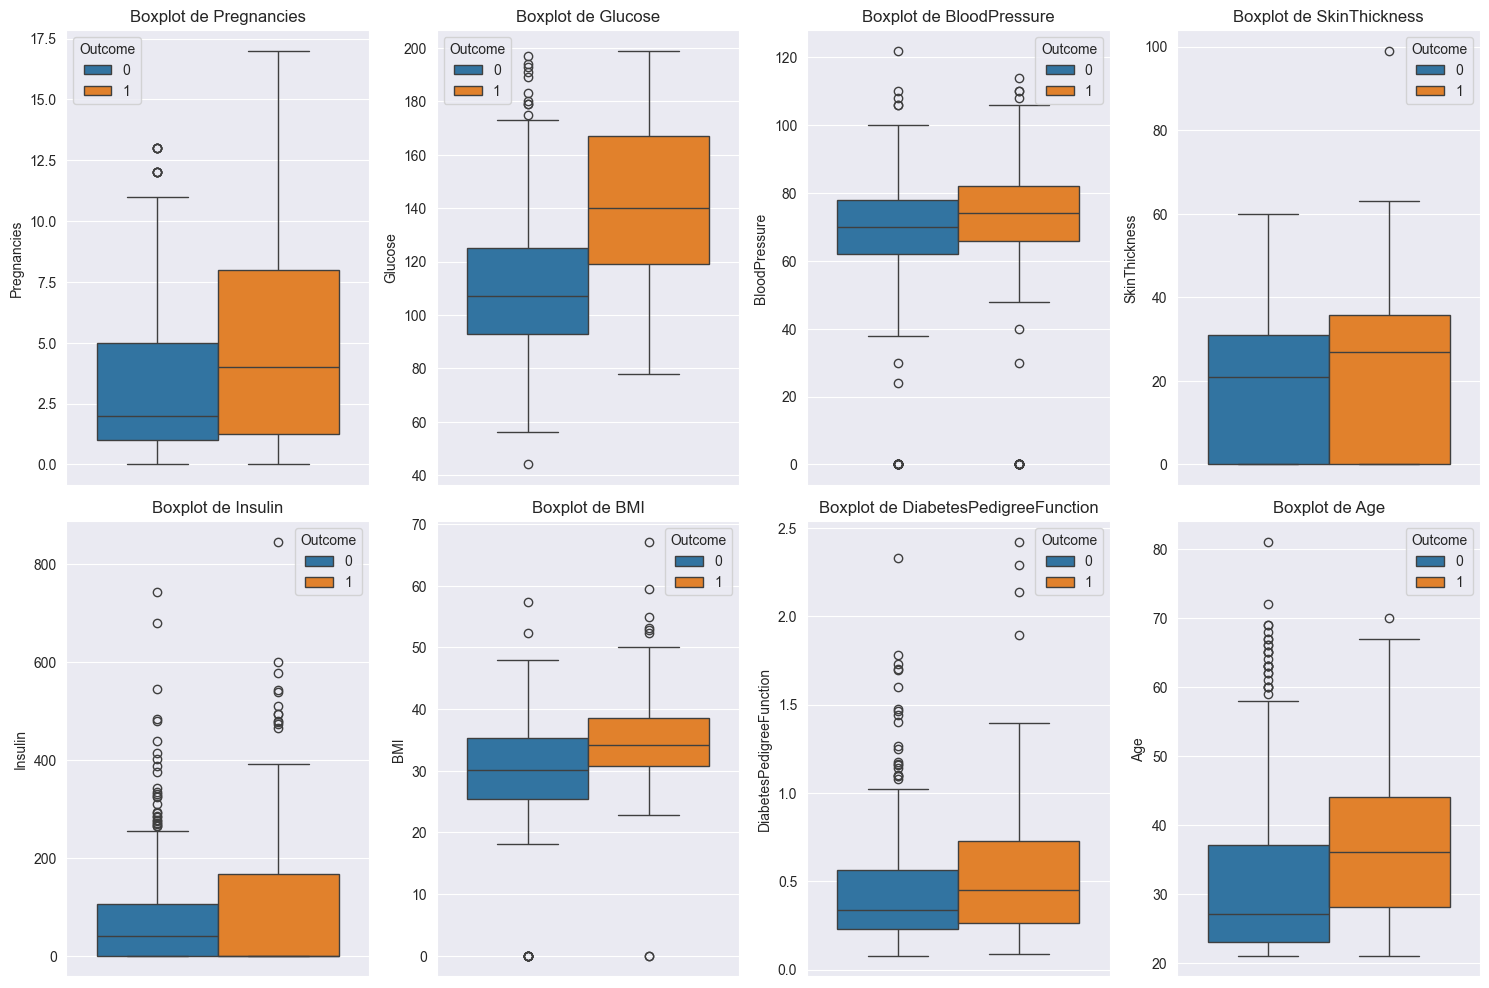

In [122]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=column, data=df, hue='Outcome')
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()

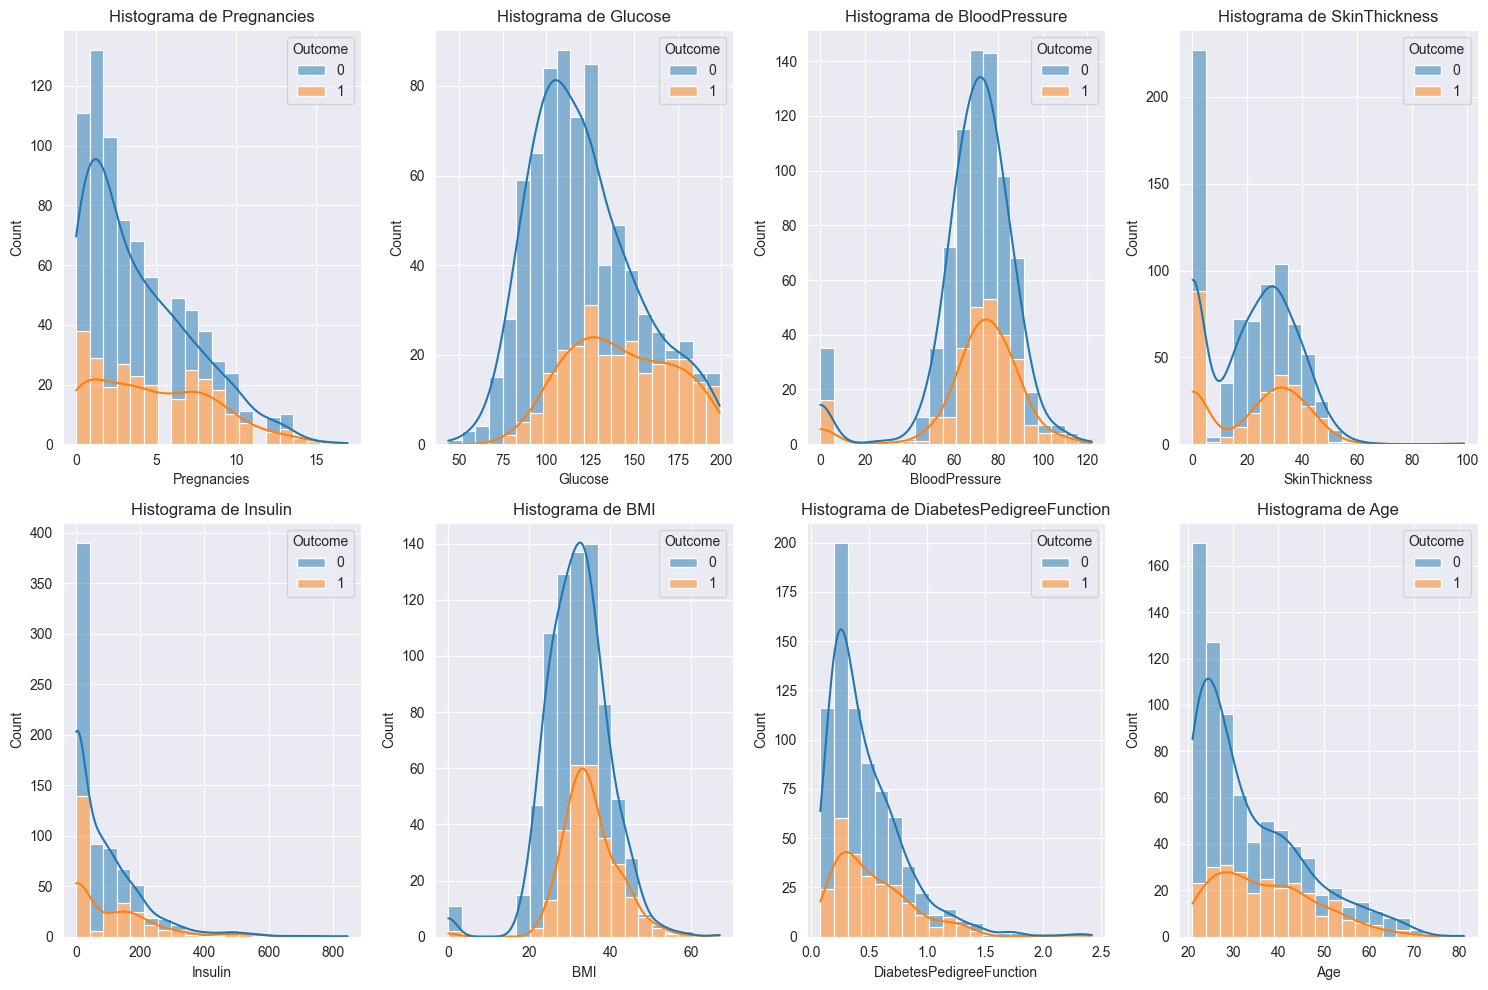

In [123]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df, x=column, hue="Outcome", kde=True, bins=20, multiple="stack")
    plt.title(f'Histograma de {column}')

plt.tight_layout()
plt.show()


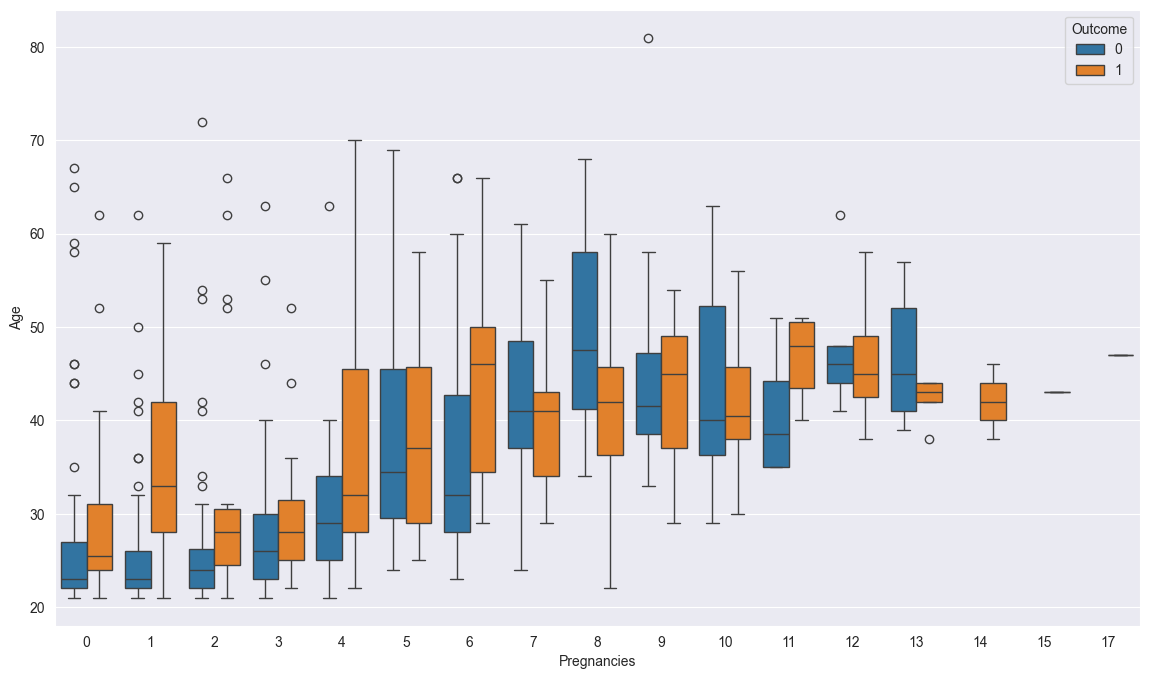

In [124]:
plt.figure(figsize=(14, 8))
sns.boxplot(df, x="Pregnancies", y="Age", hue="Outcome")
plt.show()

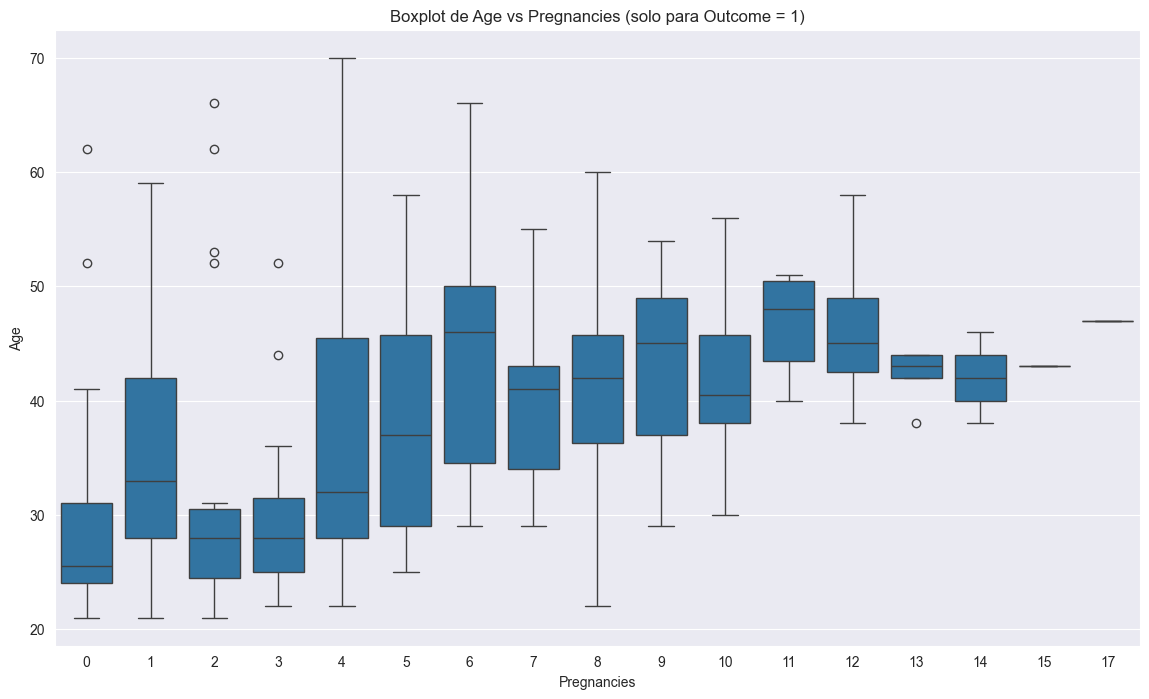

In [125]:
df_outcome_1 = df[df['Outcome'] == 1]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_outcome_1, x="Pregnancies", y="Age")
plt.title("Boxplot de Age vs Pregnancies (solo para Outcome = 1)")
plt.show()

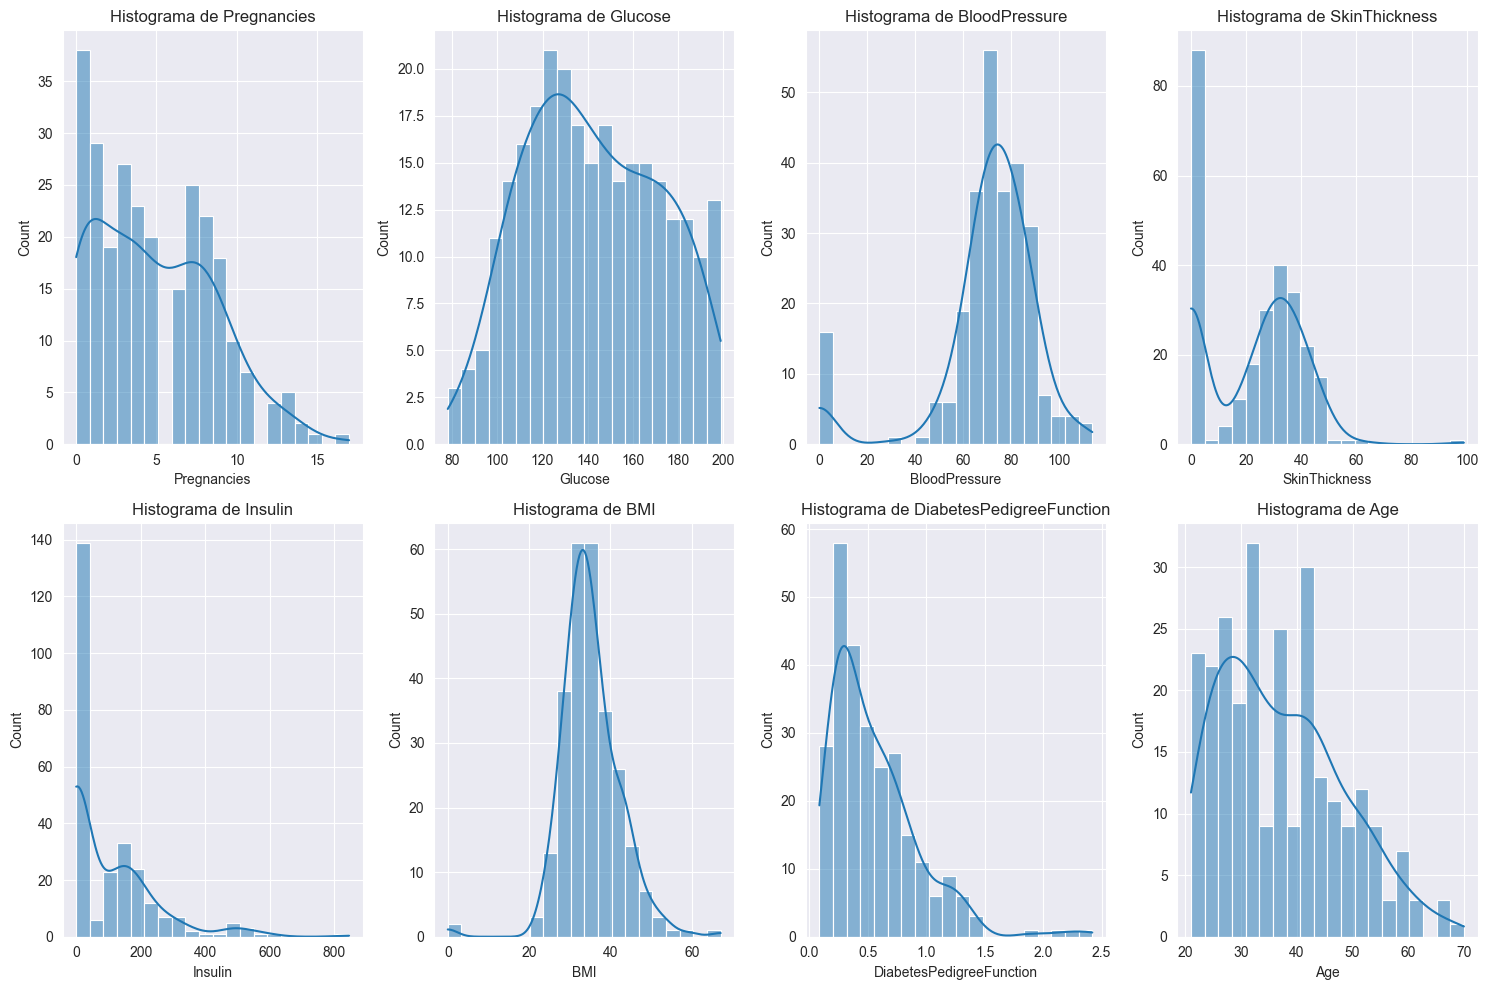

In [126]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df_outcome_1.columns[:-1]):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df_outcome_1, x=column, kde=True, bins=20, multiple="stack")
    plt.title(f'Histograma de {column}')

plt.tight_layout()
plt.show()

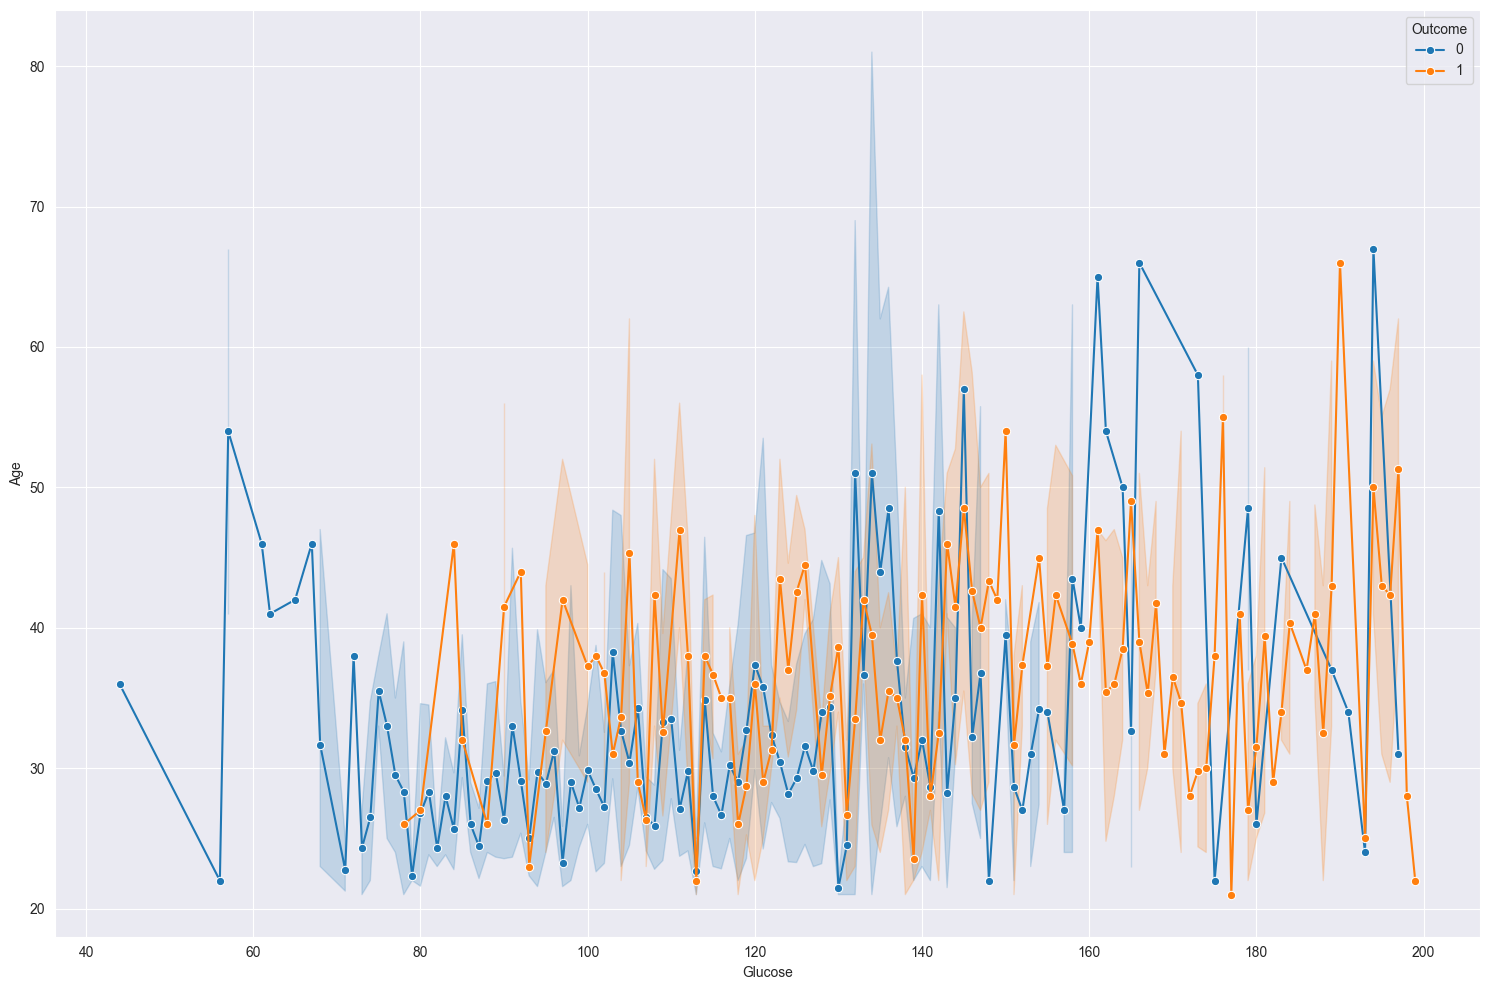

In [127]:
plt.figure(figsize=(15, 10))
sns.lineplot(df, x="Glucose", y="Age", hue="Outcome", marker='o')
plt.tight_layout()
plt.show()

In [128]:
correlation_matrix = df.corr()
print(correlation_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128135       0.140481      -0.082435   
Glucose                      0.128135  1.000000       0.158429       0.075178   
BloodPressure                0.140481  0.158429       1.000000       0.207590   
SkinThickness               -0.082435  0.075178       0.207590       1.000000   
Insulin                     -0.074960  0.331550       0.088731       0.440858   
BMI                          0.014874  0.235666       0.280781       0.391542   
DiabetesPedigreeFunction    -0.036063  0.137246       0.040426       0.183840   
Age                          0.542558  0.267136       0.239038      -0.114804   
Outcome                      0.218877  0.494650       0.063602       0.072382   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.074960  0.014874                 -0.036063   
Glucose                   0.331550  0.235

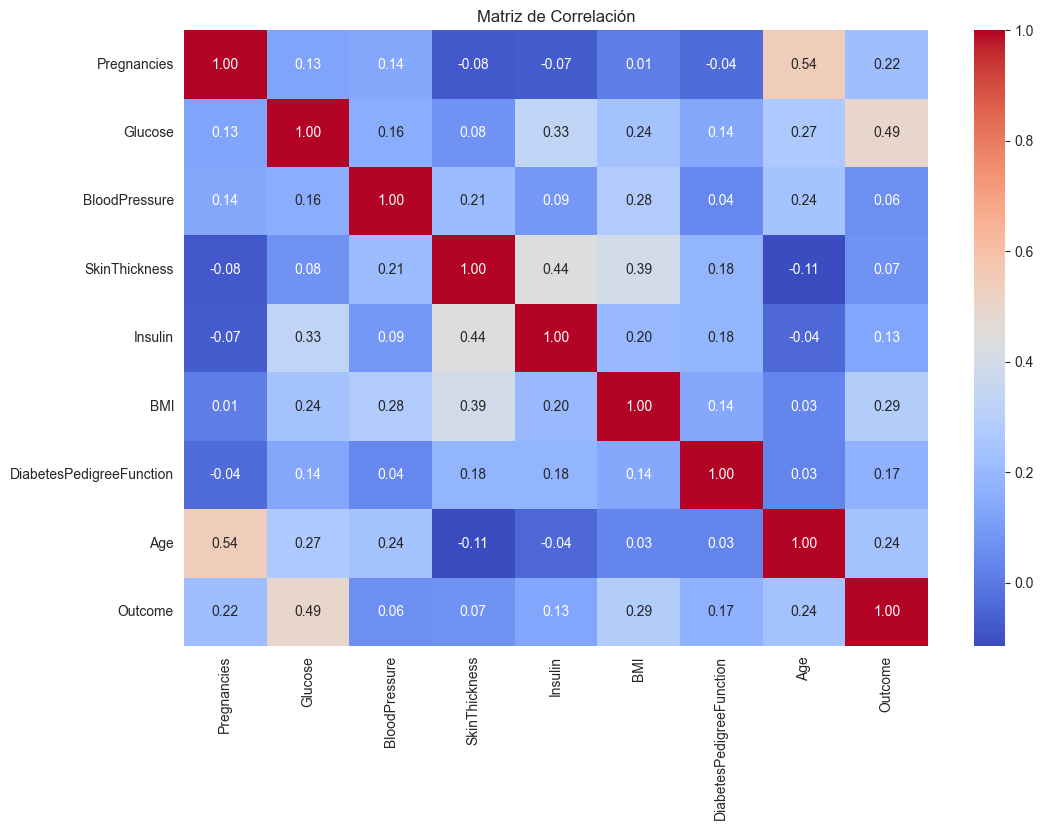

In [129]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

Correlación entre 'Glucose', 'Age', 'Pregnancies' y 'Outcome':
              Glucose       Age  Pregnancies   Outcome
Glucose      1.000000  0.267136     0.128135  0.494650
Age          0.267136  1.000000     0.542558  0.235145
Pregnancies  0.128135  0.542558     1.000000  0.218877
Outcome      0.494650  0.235145     0.218877  1.000000



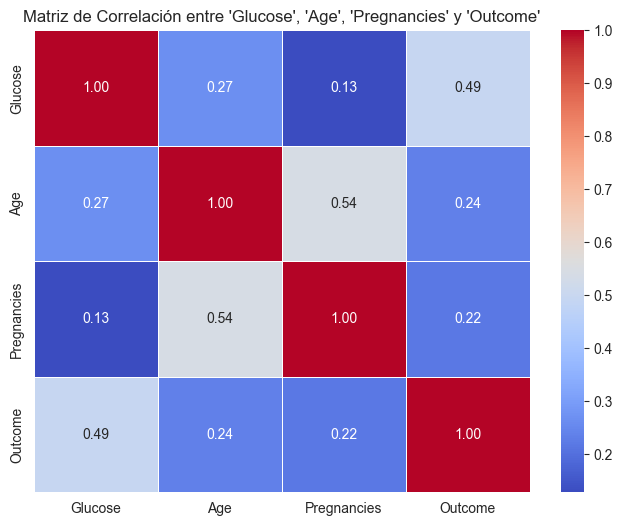

In [130]:
# Selección de las variables de interés
variables_interes = ['Glucose', 'Age', 'Pregnancies', 'Outcome']

# Correlación entre las variables seleccionadas
cor_selected_vars = df[variables_interes].corr()

# Mostrar la matriz de correlación
print(f"Correlación entre 'Glucose', 'Age', 'Pregnancies' y 'Outcome':\n{cor_selected_vars}\n")

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cor_selected_vars, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación entre 'Glucose', 'Age', 'Pregnancies' y 'Outcome'")
plt.show()


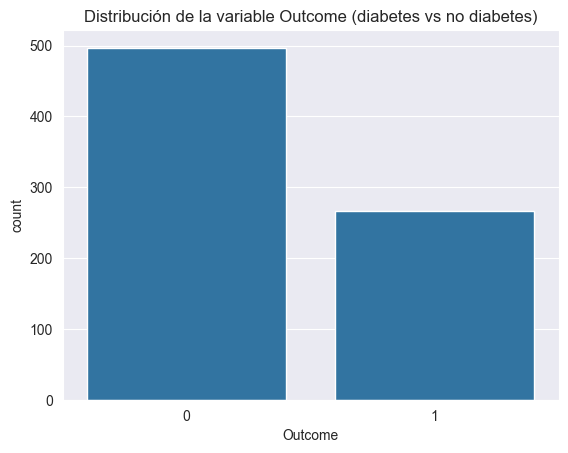

Outcome
0    497
1    266
Name: count, dtype: int64


In [131]:
# Ver la distribución de la variable objetivo 'Outcome'
sns.countplot(x='Outcome', data=df)
plt.title('Distribución de la variable Outcome (diabetes vs no diabetes)')
plt.show()

# Mostrar la cantidad de pacientes en cada clase (0 y 1)
print(df['Outcome'].value_counts())


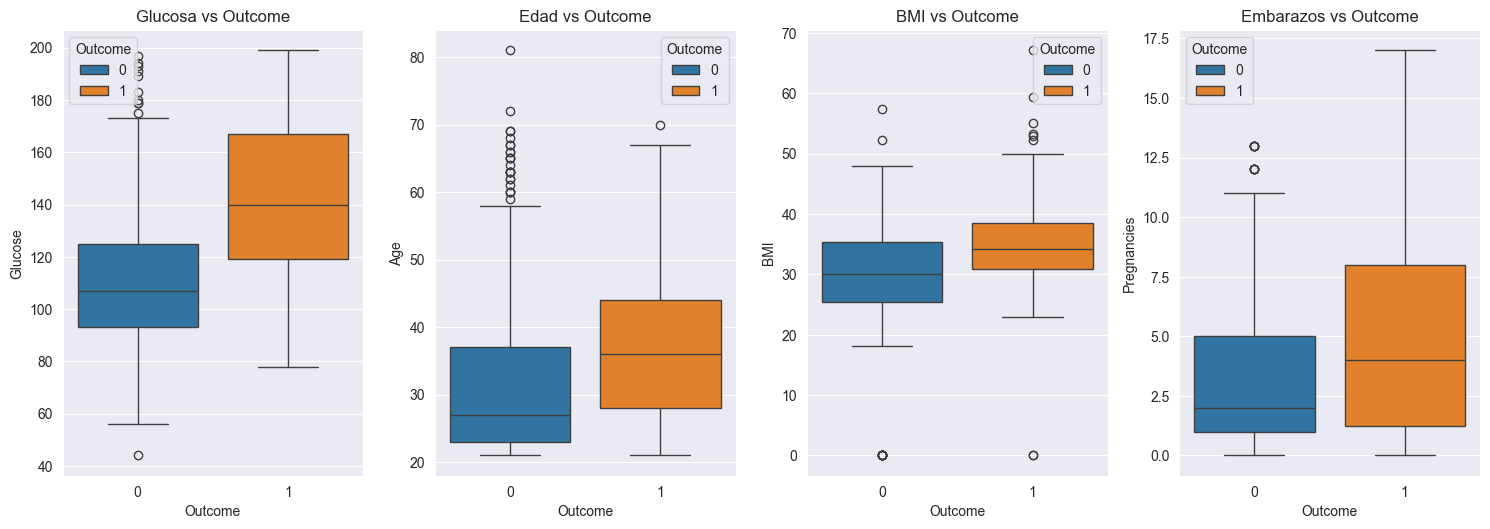

In [132]:
# Visualización de la relación entre las variables predictoras y 'Outcome'
plt.figure(figsize=(15, 10))

# Boxplot de Glucosa
plt.subplot(2, 4, 1)
sns.boxplot(df, x='Outcome', y='Glucose', hue="Outcome")
plt.title('Glucosa vs Outcome')

# Boxplot de Edad
plt.subplot(2, 4, 2)
sns.boxplot(df, x='Outcome', y='Age', hue="Outcome")
plt.title('Edad vs Outcome')

# Boxplot de BMI
plt.subplot(2, 4, 3)
sns.boxplot(df, x='Outcome', y='BMI', hue="Outcome")
plt.title('BMI vs Outcome')

# Boxplot de Embarazos
plt.subplot(2, 4, 4)
sns.boxplot(df, x='Outcome', y='Pregnancies', hue="Outcome")
plt.title('Embarazos vs Outcome')

plt.tight_layout()
plt.show()


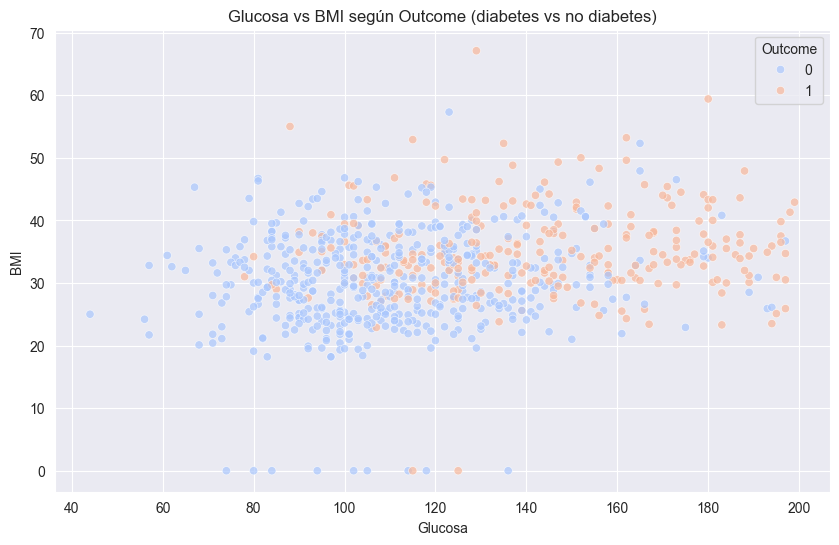

In [133]:
# Scatterplot de 'Glucose' vs 'BMI', coloreado por 'Outcome'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='coolwarm', alpha=0.7)
plt.title('Glucosa vs BMI según Outcome (diabetes vs no diabetes)')
plt.xlabel('Glucosa')
plt.ylabel('BMI')
plt.show()

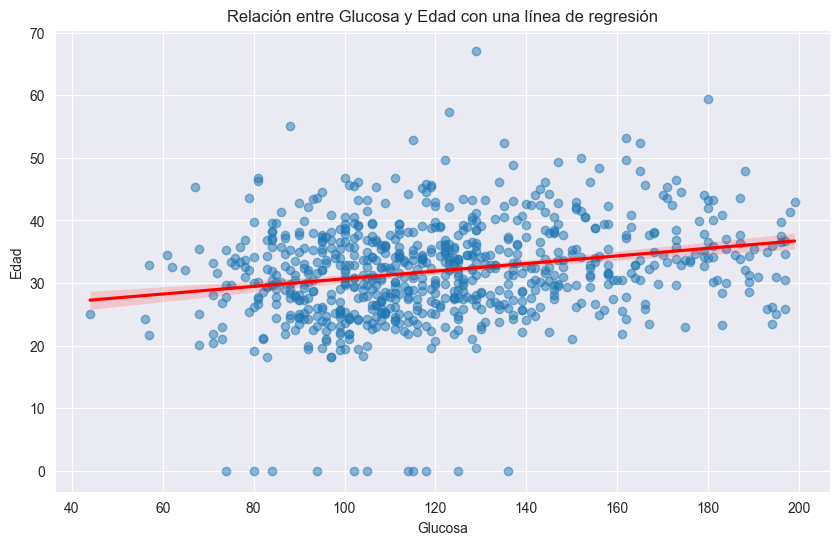

In [134]:
# Scatterplot con una línea de regresión (modelo lineal) para 'Glucose' vs 'Age'
plt.figure(figsize=(10, 6))
sns.regplot(x='Glucose', y='BMI', data=df, scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title('Relación entre Glucosa y Edad con una línea de regresión')
plt.xlabel('Glucosa')
plt.ylabel('Edad')
plt.show()

# Machine Learning

In [135]:
X = df[['Glucose', 'Age', 'BMI', 'Pregnancies']]

y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creación de las funciones para los modelos

In [136]:
def logistic_regression_model(X_train, X_test, y_train, y_test):
    model = LogisticRegression(max_iter=10000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }
    return metrics


def decision_tree_model(X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = {
        "Model": "Decision Tree",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }
    return metrics


def knn_model(X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = {
        "Model": "KNN",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }
    return metrics

In [156]:
results = {'Logistic Regression': logistic_regression_model(X_train, X_test, y_train, y_test),
           'Decision Tree': decision_tree_model(X_train, X_test, y_train, y_test),
           'KNN': knn_model(X_train, X_test, y_train, y_test)}

In [173]:
metrics_list = []

for model, metrics in results.items():
    metrics_list.append({
        "Model": model,
        "Accuracy": metrics['Accuracy'] * 100,
        "Precision": metrics['Precision'] * 100,
        "Recall": metrics['Recall'] * 100,
        "F1 Score": metrics['F1 Score'] * 100,
        "Error": (1 - metrics['Accuracy']) * 100,
    })

# Crear un DataFrame a partir de la lista de métricas
results_df = pd.DataFrame(metrics_list)

In [174]:
results_df.head()

,Model,Accuracy,Precision,Recall,F1 Score,Error
0,Logistic Regression,79.084967,69.047619,60.416667,64.444444,20.915033
1,Decision Tree,70.588235,52.459016,66.666667,58.715596,29.411765
2,KNN,77.777778,65.909091,60.416667,63.043478,22.222222


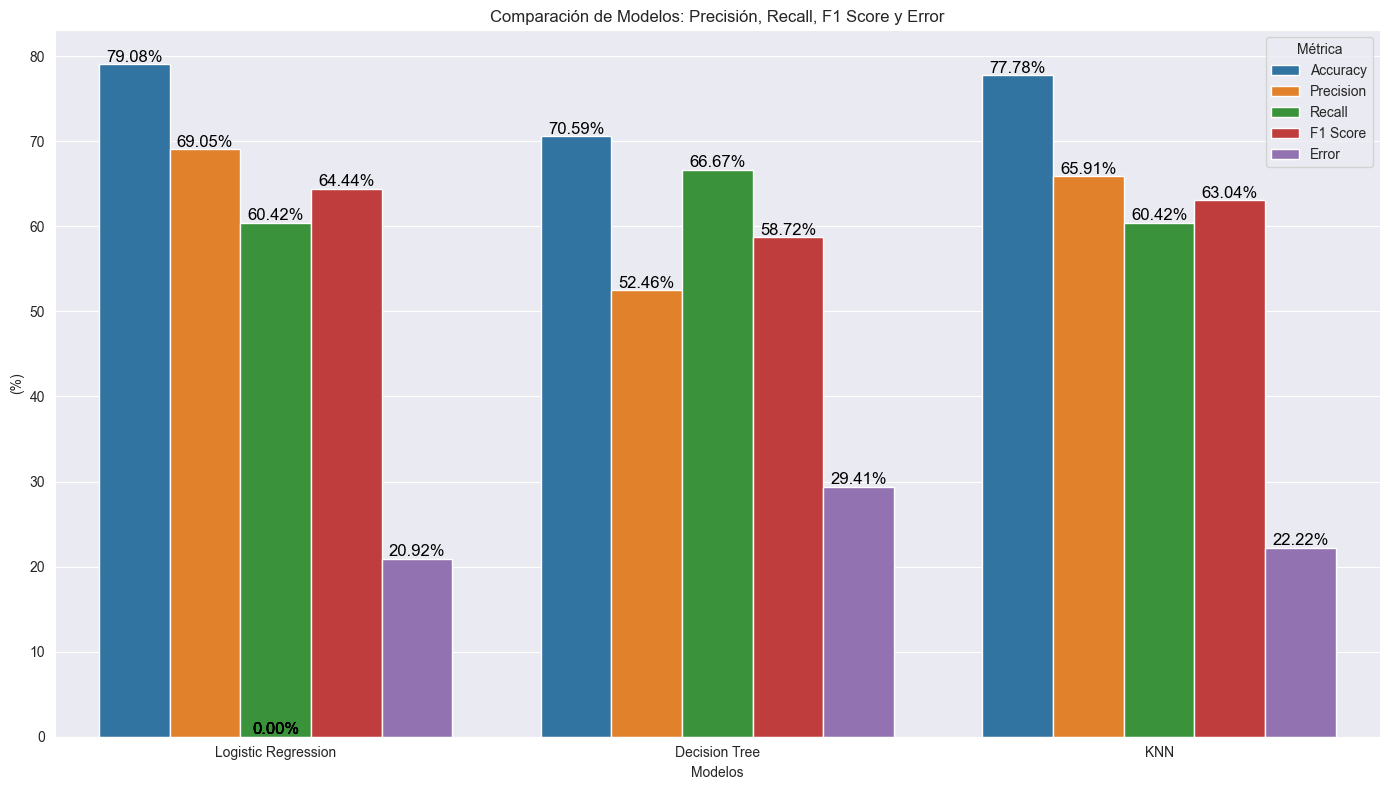

In [182]:
metrics_df = results_df.melt(id_vars=["Model"], value_vars=["Accuracy", "Precision", "Recall", "F1 Score", "Error"],
                             var_name="Metric", value_name="Value")

plt.figure(figsize=(14, 8))
ax = sns.barplot(x="Model", y="Value", hue="Metric", data=metrics_df)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Comparación de Modelos: Precisión, Recall, F1 Score y Error')
plt.ylabel('(%)')
plt.xlabel('Modelos')
plt.legend(title='Métrica')

plt.tight_layout()
plt.show()